# Model Training for Algerian Forest Fire Dataset

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('new_algerian.csv')
df.head()

,Unnamed: 0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1,6,2012,32,71,12,0,57,2,8.2,0,2,0.2,not fire,0
1,1,2,6,2012,30,73,13,4,55,2,7.8,0,2,0.2,not fire,0
2,2,3,6,2012,29,80,14,2,48,2,7.6,0,2,0.1,not fire,0
3,3,4,6,2012,30,64,14,0,79,5,15.4,2,5,1.0,not fire,0
4,4,5,6,2012,32,60,14,0,77,6,17.6,1,6,0.9,not fire,0


In [3]:
df.columns

Index(['Unnamed: 0', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [4]:
df.drop(columns=['Unnamed: 0', 'day', 'month', 'year'], inplace=True)

In [5]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,32,71,12,0,57,2,8.2,0,2,0.2,not fire,0
1,30,73,13,4,55,2,7.8,0,2,0.2,not fire,0
2,29,80,14,2,48,2,7.6,0,2,0.1,not fire,0
3,30,64,14,0,79,5,15.4,2,5,1.0,not fire,0
4,32,60,14,0,77,6,17.6,1,6,0.9,not fire,0


In [6]:
df.Classes.value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [7]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [8]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,32,71,12,0,57,2,8.2,0,2,0.2,0,0
1,30,73,13,4,55,2,7.8,0,2,0.2,0,0
2,29,80,14,2,48,2,7.6,0,2,0.1,0,0
3,30,64,14,0,79,5,15.4,2,5,1.0,0,0
4,32,60,14,0,77,6,17.6,1,6,0.9,0,0


In [9]:
df.Classes.value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

## Independent and Dependent Features

In [10]:
x = df.drop('FWI', axis=1)
y = df.FWI

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test, y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=42)
x_train.shape, x_test.shape

((182, 11), (61, 11))

In [13]:
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656205,-0.262846,-0.355828,0.704602,0.516257,0.396926,0.619308,0.487637,0.551994,-0.238981
RH,-0.656205,1.000000,0.265810,0.233198,-0.676750,-0.432142,-0.229554,-0.686920,-0.367701,-0.451274,0.420868
Ws,-0.262846,0.265810,1.000000,0.193973,-0.187886,-0.022301,0.077952,-0.015559,0.018327,-0.092707,0.229087
Rain,-0.355828,0.233198,0.193973,1.000000,-0.500198,-0.259834,-0.271314,-0.289733,-0.271489,-0.309962,0.095445
FFMC,0.704602,-0.676750,-0.187886,-0.500198,1.000000,0.626603,0.504343,0.731295,0.608370,0.772054,-0.260278
DMC,0.516257,-0.432142,-0.022301,-0.259834,0.626603,1.000000,0.855260,0.678496,0.978428,0.608694,-0.187315
DC,0.396926,-0.229554,0.077952,-0.271314,0.504343,0.855260,1.000000,0.480316,0.930619,0.497591,0.098502
ISI,0.619308,-0.686920,-0.015559,-0.289733,0.731295,0.678496,0.480316,1.000000,0.634933,0.739115,-0.243622
BUI,0.487637,-0.367701,0.018327,-0.271489,0.608370,0.978428,0.930619,0.634933,1.000000,0.602638,-0.076805
Classes,0.551994,-0.451274,-0.092707,-0.309962,0.772054,0.608694,0.497591,0.739115,0.602638,1.000000,-0.197613


<Axes: >

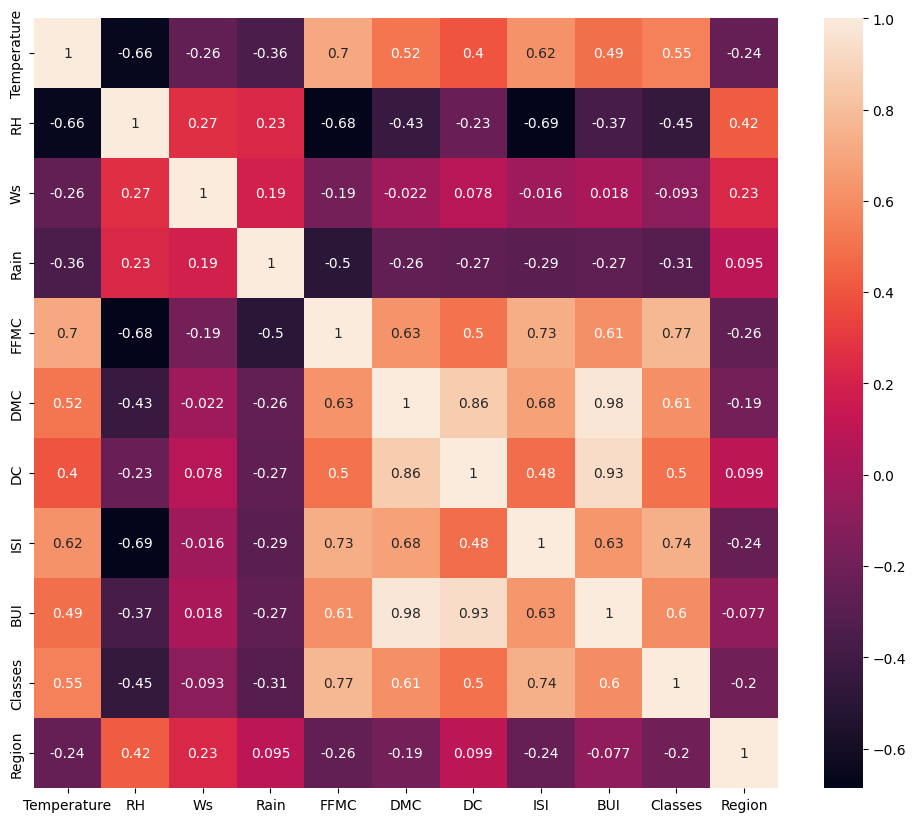

In [14]:
plt.figure(figsize=(12,10))
corr=x_train.corr()
sns.heatmap(corr, annot=True)

In [15]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [16]:
corr_features = correlation(x_train, 0.85)
corr_features

{'BUI', 'DC'}

In [17]:
x_train.shape, x_test.shape

((182, 11), (61, 11))

In [18]:
x_train.columns, x_test.columns

(Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
        'Classes', 'Region'],
       dtype='object'),
 Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
        'Classes', 'Region'],
       dtype='object'))

In [19]:
x_train.drop(corr_features, axis=1, inplace=True)
x_test.drop(corr_features, axis=1, inplace=True)
x_train.shape, x_test.shape

((182, 9), (61, 9))

### Feature Scaling or Standardization

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [21]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

### Box plot to understand Effect of Standard Scaler

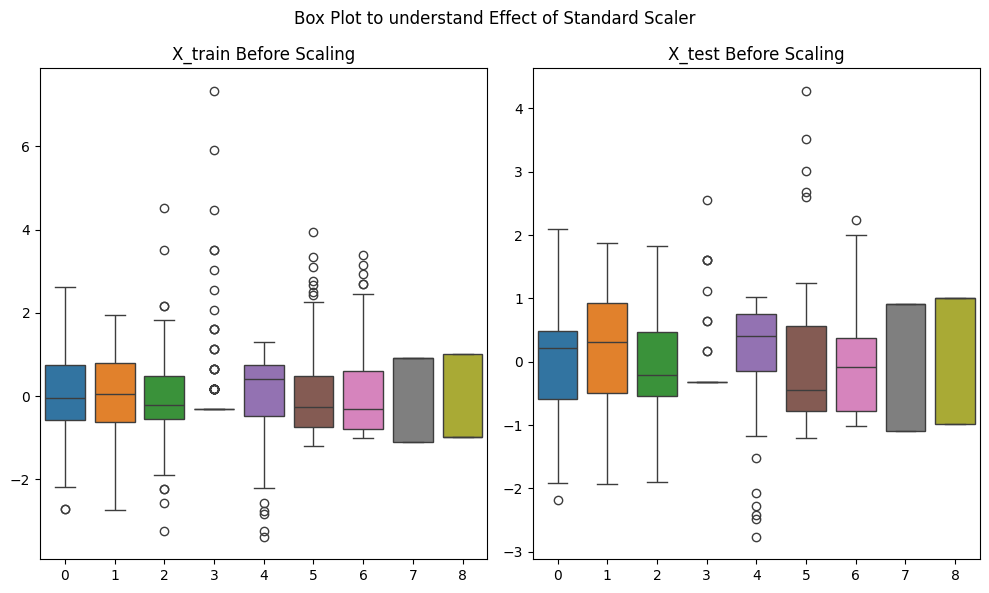

In [22]:
plt.figure(figsize=(10,6))
plt.suptitle('Box Plot to understand Effect of Standard Scaler')
plt.subplot(1,2,1)
plt.title('X_train Before Scaling')
sns.boxplot(data=x_train)
plt.subplot(1,2,2)
plt.title('X_test Before Scaling')
sns.boxplot(data=x_test)
plt.tight_layout()
plt.show()


### Linear Regression Model

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
mse = mean_squared_error(y_pred, y_test)
score = r2_score(y_pred, y_test)
print(mse)
print(score)


0.7860333238060102
0.9845802500513948


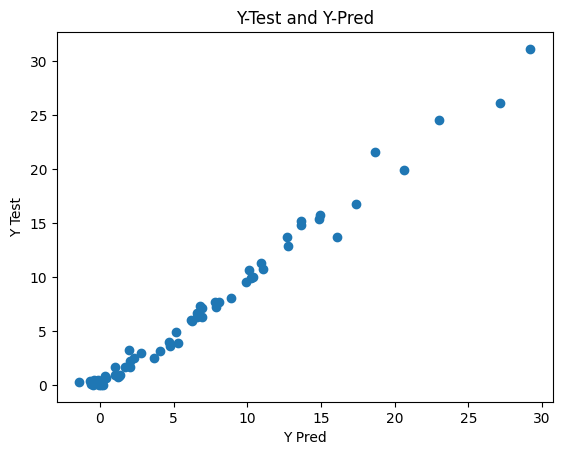

In [24]:
plt.title('Y-Test and Y-Pred')
plt.scatter(y_pred, y_test)
plt.xlabel('Y Pred')
plt.ylabel('Y Test')
plt.show()

### Lasso Regression Model
##### Lasso Regression is also known as Least Absolute Shrinkage ans Selection Operation. Lasso Regression use L1 Regularization to shrink co-efficient towards the means. This can force certain features coefficient to be zero, performing feature selection alongside regularization. Lasso Regressioncan be used for automatic feature selection and to handle multi-colinearity in input data be reducing the impact of correlated features on coefficient.

In [26]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
lass = Lasso()
lass.fit(x_train, y_train)
y_pred = lass.predict(x_test)
l_mse = mean_squared_error(y_pred, y_test)
l_score = r2_score(y_pred, y_test)
print(f'Mean Squared Error: {l_mse}')
print(f'R Squared Error: {l_score}')

Mean Squared Error: 2.1496012411981096
R Squared Error: 0.9404760860723494


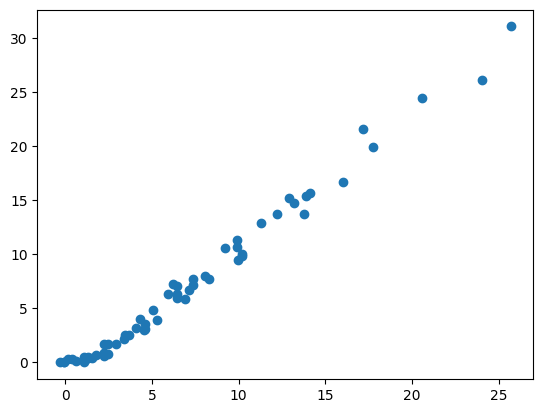

In [27]:
plt.scatter(y_pred, y_test)

### Cross Validataion Cross

In [28]:
from sklearn.linear_model import LassoCV
lassoCV = LassoCV(cv=5)
lassoCV.fit(x_train, y_train)

LassoCV(cv=5)

In [29]:
lassoCV.alpha_

0.04541988249914328

In [33]:
y_pred_lcv = lassoCV.predict(x_test)
mean_squared_error(y_pred_lcv, y_test)

0.777802166572415

In [34]:
r2_score(y_pred, y_test)

0.9843621285140934

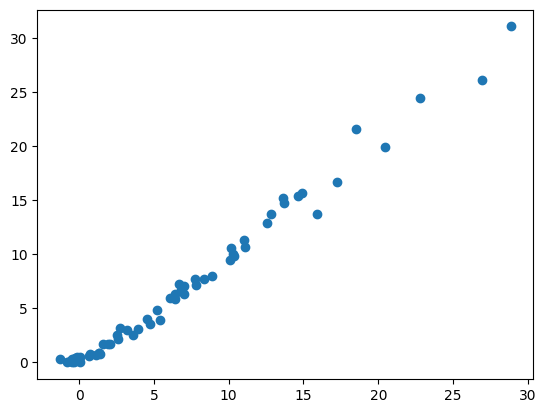

In [35]:
plt.scatter(y_pred_lcv, y_test)

## Ridge Regression
##### L2 Regularization

In [37]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x_train, y_train)
y_pred_rid = ridge.predict(x_test)
mse_rid = mean_squared_error(y_test, y_pred_rid)
score_rid = r2_score(y_test, y_pred_rid)
print(f'Mean Squared Error if {mse_rid}')
print(f'R Squared Error if {score_rid}')

Mean Squared Error if 0.8126660443546625
R Squared Error if 0.9845430940130523


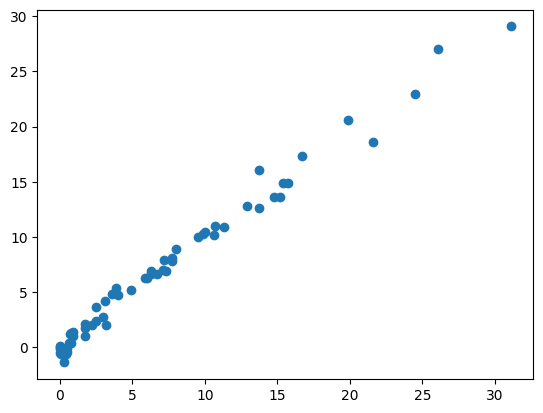

In [38]:
plt.scatter(y_test, y_pred_rid)

## RidgeCV

In [45]:
from sklearn.linear_model import RidgeCV
rid_cv = RidgeCV(cv=5)
rid_cv.fit(x_train, y_train)
y_pred_rcv = rid_cv.predict(x_test)
mse_rid_rcv = mean_squared_error(y_test, y_pred_rid)
score_rid_rcv = r2_score(y_test, y_pred_rid)
print(f'Mean Squared Error if {mse_rid_rcv}')
print(f'R Squared Error if {score_rid_rcv}')

Mean Squared Error if 0.8126660443546625
R Squared Error if 0.9845430940130523


In [43]:
rid_cv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

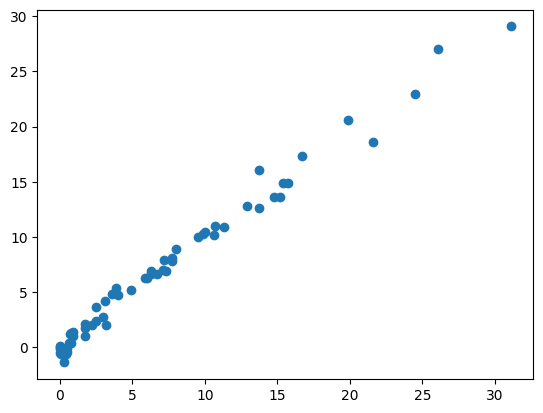

In [40]:
plt.scatter(y_test, y_pred_rcv)

## ElasticNet

In [46]:
from sklearn.linear_model import ElasticNet
eln = ElasticNet()
eln.fit(x_train, y_train)
y_pred_eln = eln.predict(x_test)
mse_eln = mean_squared_error(y_test, y_pred_rid)
score_eln = r2_score(y_test, y_pred_rid)
print(f'Mean Squared Error if {mse_eln}')
print(f'R Squared Error if {score_eln}')

Mean Squared Error if 0.8126660443546625
R Squared Error if 0.9845430940130523


In [52]:
eln.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

# Pickling the Preprocessing and Modelling

In [53]:
scaler

StandardScaler()

In [54]:
ridge

Ridge()

In [55]:
import pickle
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(ridge, open('ridge.pkl', 'wb'))

##### scaler.pkl ----------> Feature Scaling
##### ridge.pkl -----------> Model